In [5]:
import numpy as np
import pandas as pd
import sys; sys.path.append('..')

from helpers.lift import area_ratio_scorer, area_ratio, plot_lift_chart

df = pd.read_csv('../data/engineered.csv')
df.head()

,Unnamed: 0,X1,X3,X5,X6,X7,X8,X9,X10,X11,...,payment_total,payment_avg,payment_std,payment_max,payment_min,payment_growth,payment_trend,payment_zero_count,payment_all_zero,payment_low_count
0,0,20000,2,24,2,2,-1,-1,-2,-2,...,689,114.833336,281.28308,689,0,0,59.057144,5,0,6
1,1,120000,2,26,-1,2,0,0,0,2,...,5000,833.333300,752.77264,2000,0,-2000,-200.000000,2,0,2
2,2,90000,2,34,0,0,0,0,0,0,...,11018,1836.333400,1569.81540,5000,1000,-3482,-454.571440,0,0,0
3,3,50000,2,37,0,0,0,0,0,0,...,8388,1398.000000,478.05817,2019,1000,1000,227.142850,0,0,0
4,4,50000,2,57,-1,0,-1,0,0,0,...,59049,9841.500000,13786.23000,36681,679,1321,3302.314200,0,0,2


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define pipeline
rf_optimization_pipeline = Pipeline([
    ('rf_opt_clf', RandomForestClassifier())
])

# Define parameter distributions
param_distributions = {
    'rf_opt_clf__n_estimators': randint(100, 501),  # 100 to 500
    'rf_opt_clf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf_opt_clf__max_depth': [5, 10, 20, None],
    'rf_opt_clf__min_samples_split': randint(2, 11),  # 2 to 10
    'rf_opt_clf__min_samples_leaf': randint(1, 5),    # 1 to 4
    'rf_opt_clf__min_weight_fraction_leaf': [0.0, 0.01],
    'rf_opt_clf__max_features': ['sqrt', 'log2', None],
    'rf_opt_clf__max_leaf_nodes': [None, 50, 100],
    'rf_opt_clf__min_impurity_decrease': [0.0, 0.01],
    'rf_opt_clf__bootstrap': [True, False],
    'rf_opt_clf__class_weight': [None, 'balanced'],
    'rf_opt_clf__ccp_alpha': [0.0, 0.01],
    'rf_opt_clf__random_state': [42],
}

# Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_optimization_pipeline,
    param_distributions=param_distributions,
    n_iter=100, 
    cv=10,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit search
random_search_rf.fit(X_train, y_train)

# Output best results
print("Best Params:", random_search_rf.best_params_)
print("Best CV Area Ratio:", random_search_rf.best_score_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END rf_opt_clf__bootstrap=True, rf_opt_clf__ccp_alpha=0.01, rf_opt_clf__class_weight=None, rf_opt_clf__criterion=log_loss, rf_opt_clf__max_depth=20, rf_opt_clf__max_features=sqrt, rf_opt_clf__max_leaf_nodes=None, rf_opt_clf__min_impurity_decrease=0.0, rf_opt_clf__min_samples_leaf=2, rf_opt_clf__min_samples_split=4, rf_opt_clf__min_weight_fraction_leaf=0.0, rf_opt_clf__n_estimators=430, rf_opt_clf__random_state=42; total time=  42.9s
[CV] END rf_opt_clf__bootstrap=True, rf_opt_clf__ccp_alpha=0.01, rf_opt_clf__class_weight=None, rf_opt_clf__criterion=log_loss, rf_opt_clf__max_depth=20, rf_opt_clf__max_features=sqrt, rf_opt_clf__max_leaf_nodes=None, rf_opt_clf__min_impurity_decrease=0.0, rf_opt_clf__min_samples_leaf=2, rf_opt_clf__min_samples_split=4, rf_opt_clf__min_weight_fraction_leaf=0.0, rf_opt_clf__n_estimators=430, rf_opt_clf__random_state=42; total time=  42.9s
[CV] END rf_opt_clf__bootstrap=True, rf_opt_clf__cc

Best Params: {'rf_opt_clf__bootstrap': False, 'rf_opt_clf__ccp_alpha': 0.0, 'rf_opt_clf__class_weight': None, 'rf_opt_clf__criterion': 'gini', 'rf_opt_clf__max_depth': None, 'rf_opt_clf__max_features': 'log2', 'rf_opt_clf__max_leaf_nodes': 100, 'rf_opt_clf__min_impurity_decrease': 0.0, 'rf_opt_clf__min_samples_leaf': 1, 'rf_opt_clf__min_samples_split': 8, 'rf_opt_clf__min_weight_fraction_leaf': 0.01, 'rf_opt_clf__n_estimators': 225, 'rf_opt_clf__random_state': 42}
Best CV Area Ratio: 0.5734069524109

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_optimized_pipeline = Pipeline([
    ('dt_clf', RandomForestClassifier(
                                    bootstrap=False,
                                    ccp_alpha=0.0,
                                    class_weight=None,
                                    max_depth=None,
                                    max_features='log2',
                                    max_leaf_nodes=100,
                                    min_impurity_decrease=0.0,
                                    min_samples_leaf=1,
                                    min_samples_split=8,
                                    min_weight_fraction_leaf=0.01,
                                    n_estimators=225,
                                    criterion='gini', 
                                    random_state=42
                                ))
    ])

rf_optimized_pipeline.fit(X_train, y_train)


,steps,"[('dt_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,n_estimators,225
,criterion,'gini'
,max_depth,None
,min_samples_split,8
,min_samples_leaf,1
,min_weight_fraction_leaf,0.01
,max_features,'log2'


In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred_optimized = rf_optimized_pipeline.predict(X_train)
y_train_proba_optimized = rf_optimized_pipeline.predict_proba(X_train)[:, 1]

y_test_pred_optimized = rf_optimized_pipeline.predict(X_test)
y_test_proba_optimized = rf_optimized_pipeline.predict_proba(X_test)[:, 1]

train_optimized_error = 1 - accuracy_score(y_train, y_train_pred_optimized)
train_optimized_area = area_ratio(y_train, y_train_proba_optimized)

test_optimized_error = 1 - accuracy_score(y_test, y_test_pred_optimized)
test_optimized_area = area_ratio(y_test, y_test_proba_optimized)

In [9]:
print(f'TRAIN: Error Rate {train_optimized_error:.4f}\n')
print(f'TRAIN: Area Ratio {train_optimized_area:.4f}\n')
print("TRAIN: Classification Report")
print(classification_report(y_train, y_train_pred_optimized, digits=4, zero_division=0))

TRAIN: Error Rate 0.1770

TRAIN: Area Ratio 0.6198

TRAIN: Classification Report
              precision    recall  f1-score   support

           0     0.8432    0.9496    0.8933     16357
           1     0.6774    0.3746    0.4824      4618

    accuracy                         0.8230     20975
   macro avg     0.7603    0.6621    0.6878     20975
weighted avg     0.8067    0.8230    0.8028     20975



In [10]:
print(f'TEST: Error Rate {test_optimized_error:.4f}\n')
print(f'TEST: Area Ratio {test_optimized_area:.4f}\n')
print("TEST: Classification Report")
print(classification_report(y_test, y_test_pred_optimized, digits=4, zero_division=0))

TEST: Error Rate 0.1801

TEST: Area Ratio 0.5622

TEST: Classification Report
              precision    recall  f1-score   support

           0     0.8384    0.9513    0.8913      6978
           1     0.6831    0.3643    0.4752      2012

    accuracy                         0.8199      8990
   macro avg     0.7608    0.6578    0.6833      8990
weighted avg     0.8037    0.8199    0.7982      8990



In [11]:
import numpy as np

# Sort by highest predicted risk
sorted_idx = np.argsort(-y_test_proba_optimized)  # descending order
y_true_sorted = y_test.iloc[sorted_idx].reset_index(drop=True)  # sorted ground truth


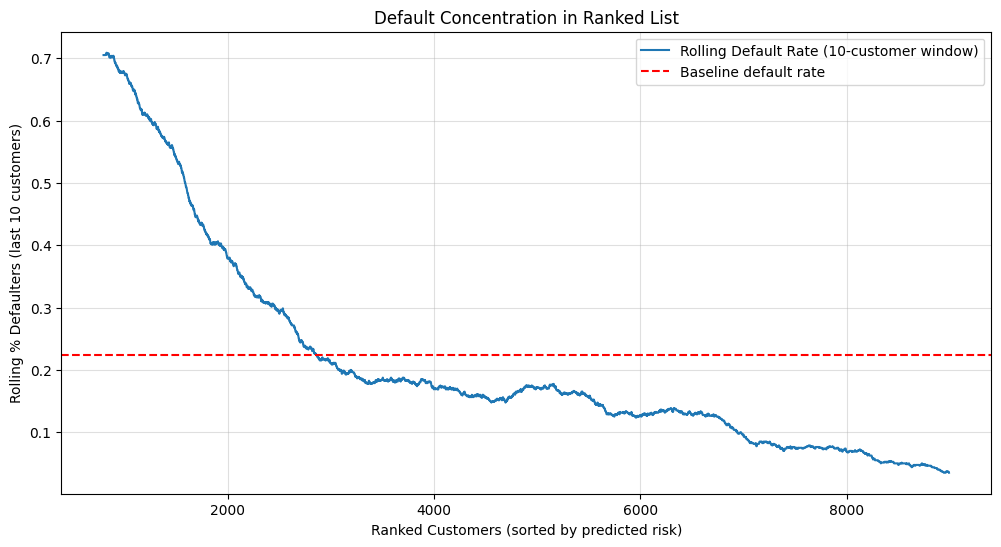

In [12]:
import matplotlib.pyplot as plt

window_size = 800  # rolling over 10 customers
rolling_default_rate = y_true_sorted.rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))

plt.plot(
    rolling_default_rate.values,
    label="Rolling Default Rate (10-customer window)"
)

# Baseline average default rate in test set
plt.axhline(y=y_test.mean(), color="red", linestyle="--", label="Baseline default rate")

plt.xlabel("Ranked Customers (sorted by predicted risk)")
plt.ylabel("Rolling % Defaulters (last 10 customers)")
plt.title("Default Concentration in Ranked List")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [13]:
import pandas as pd
import numpy as np

# Total number of customers
n = len(y_true_sorted)

# Total defaults
total_defaults = y_true_sorted.sum()

decile_results = []

# For each decile (10%, 20%, ..., 100%)
for d in range(5, 110, 5):
    cutoff = int((d/100) * n)  # number of customers in top d%
    captured_defaults = y_true_sorted.iloc[:cutoff].sum()
    captured_pct = (captured_defaults / total_defaults) * 100
    decile_results.append({"Top % Population": f"Top {d}%", 
                           "Defaults Captured (%)": round(captured_pct, 2)})

# Create table
decile_df = pd.DataFrame(decile_results)
print(decile_df)


   Top % Population  Defaults Captured (%)
0            Top 5%                  16.70
1           Top 10%                  31.66
2           Top 15%                  42.94
3           Top 20%                  51.09
4           Top 25%                  57.85
5           Top 30%                  62.87
6           Top 35%                  66.95
7           Top 40%                  71.17
8           Top 45%                  74.80
9           Top 50%                  78.43
10          Top 55%                  82.41
11          Top 60%                  85.24
12          Top 65%                  88.22
13          Top 70%                  91.45
14          Top 75%                  93.84
15          Top 80%                  95.23
16          Top 85%                  97.02
17          Top 90%                  98.31
18          Top 95%                  99.25
19         Top 100%                 100.00
20         Top 105%                 100.00


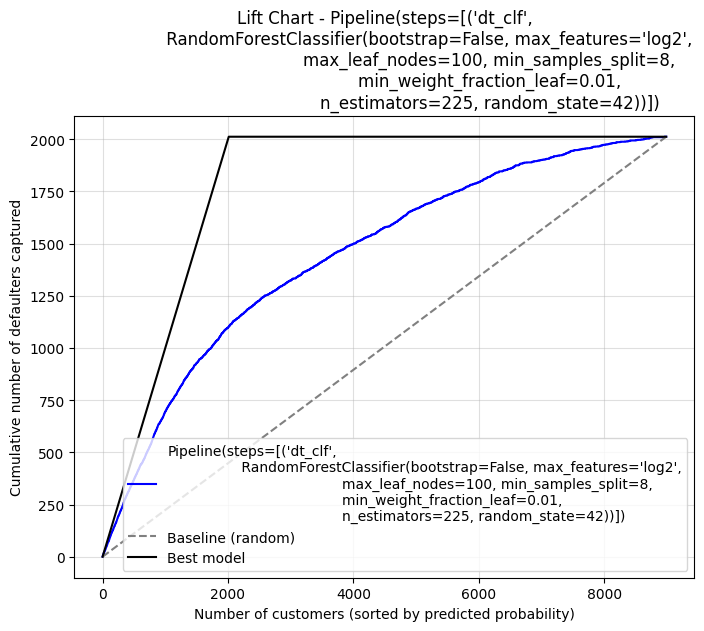

In [14]:
plot_lift_chart(y_test, y_test_proba_optimized, rf_optimized_pipeline)